![Iris](images/iris-machinelearning.png)

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

# Load data
iris = datasets.load_iris()
feature_names = list(iris.feature_names)[:2]
target_names = list(iris.target_names)
X = iris.data[:, [0, 1]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(target_names)
print(feature_names)
print(X[:5,:])

['setosa', 'versicolor', 'virginica']
['sepal length (cm)', 'sepal width (cm)']
[[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]
 [ 4.6  3.1]
 [ 5.   3.6]]


In [9]:
from sklearn.tree import DecisionTreeClassifier

iris_tree = DecisionTreeClassifier(max_depth=2, random_state=42)

iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [10]:
# what we expect
print(y_test)

# predict
predictions = iris_tree.predict(X_test)
print("Predictions")
print(predictions)

# test
from sklearn.metrics import accuracy_score
print("Accuracy Score")
print(accuracy_score(y_test, predictions))

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
Predictions
[2 2 1 2 0 2 0 2 2 2 2 2 2 2 2 0 2 1 0 0 1 1 0 0 2 0 0 2 1 0 2 0 0 2 2 1 1
 2 2 2 2 0 2 0 0]
Accuracy Score
0.622222222222


In [6]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

print(X_combined[0:5, :])
print(y_combined[:5])

[[ 5.   2. ]
 [ 6.5  3. ]
 [ 6.7  3.3]
 [ 6.   2.2]
 [ 6.7  2.5]]
[1 2 2 2 2]


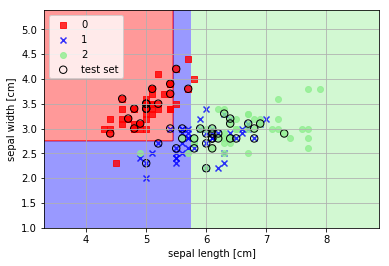

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], facecolors='none', edgecolors='black',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')


plot_decision_regions(X_combined, y_combined,
         classifier=iris_tree, test_idx=range(105,150))

plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

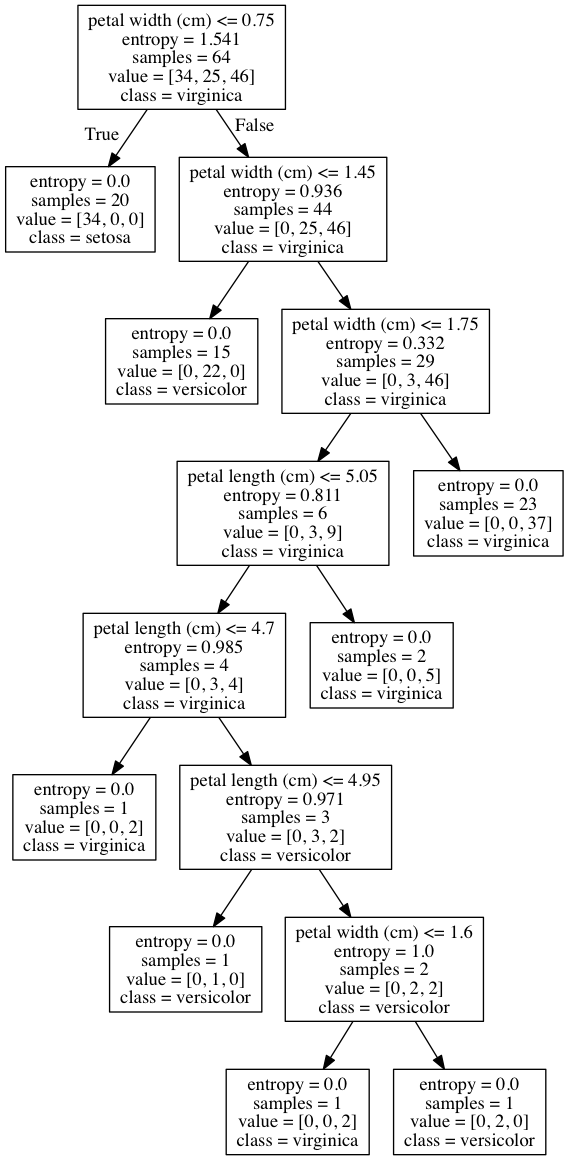

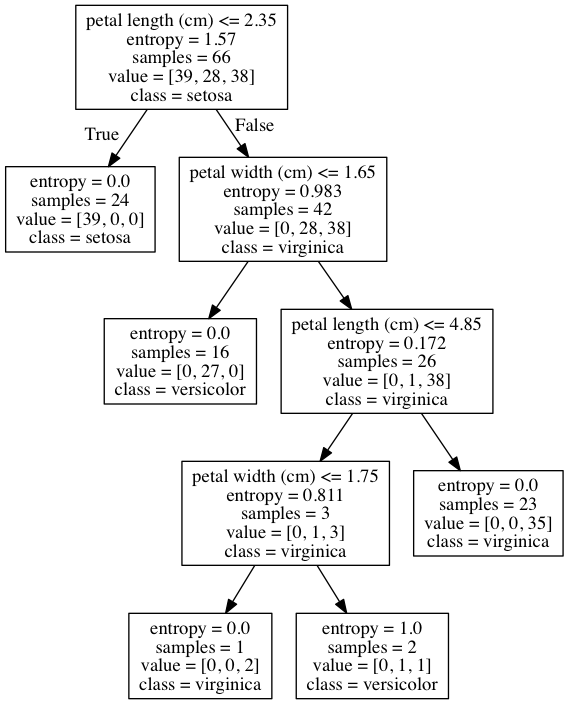

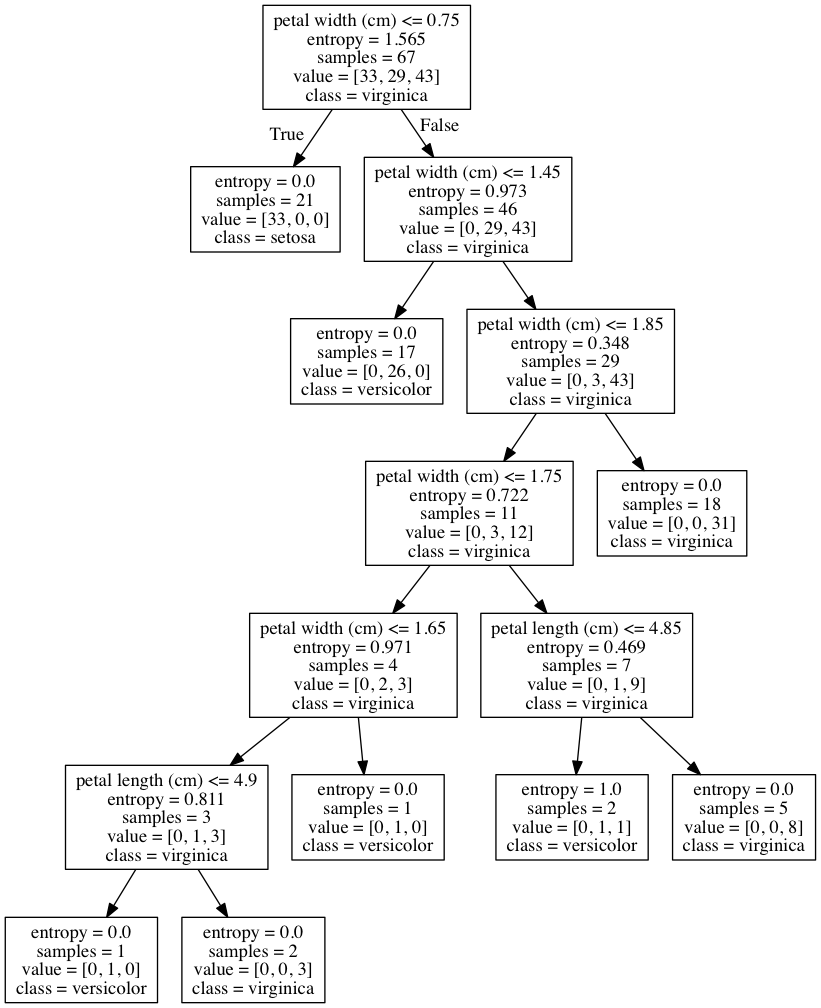

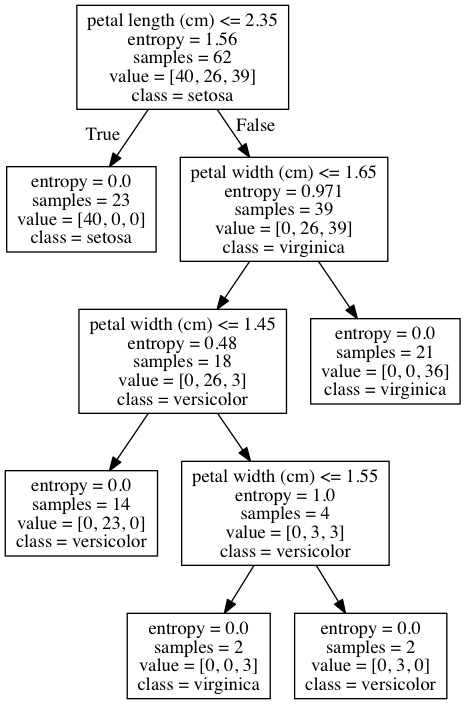

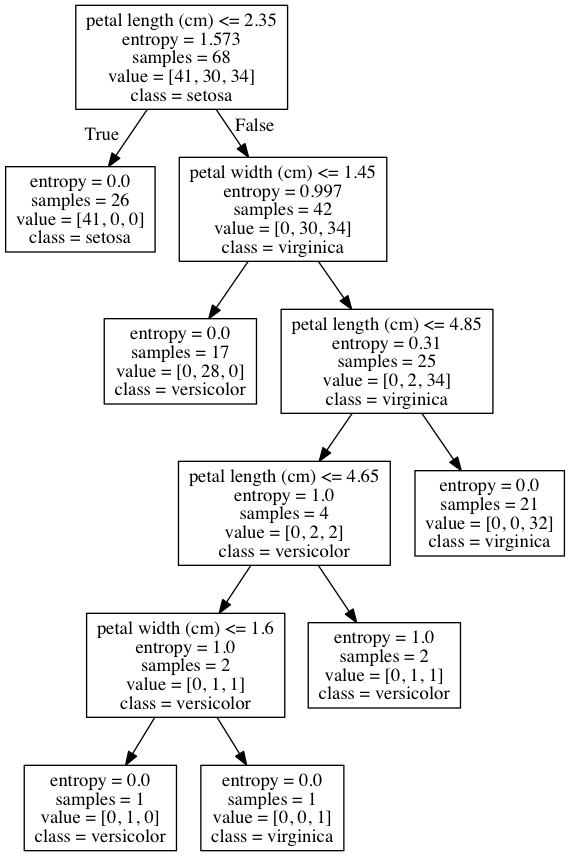

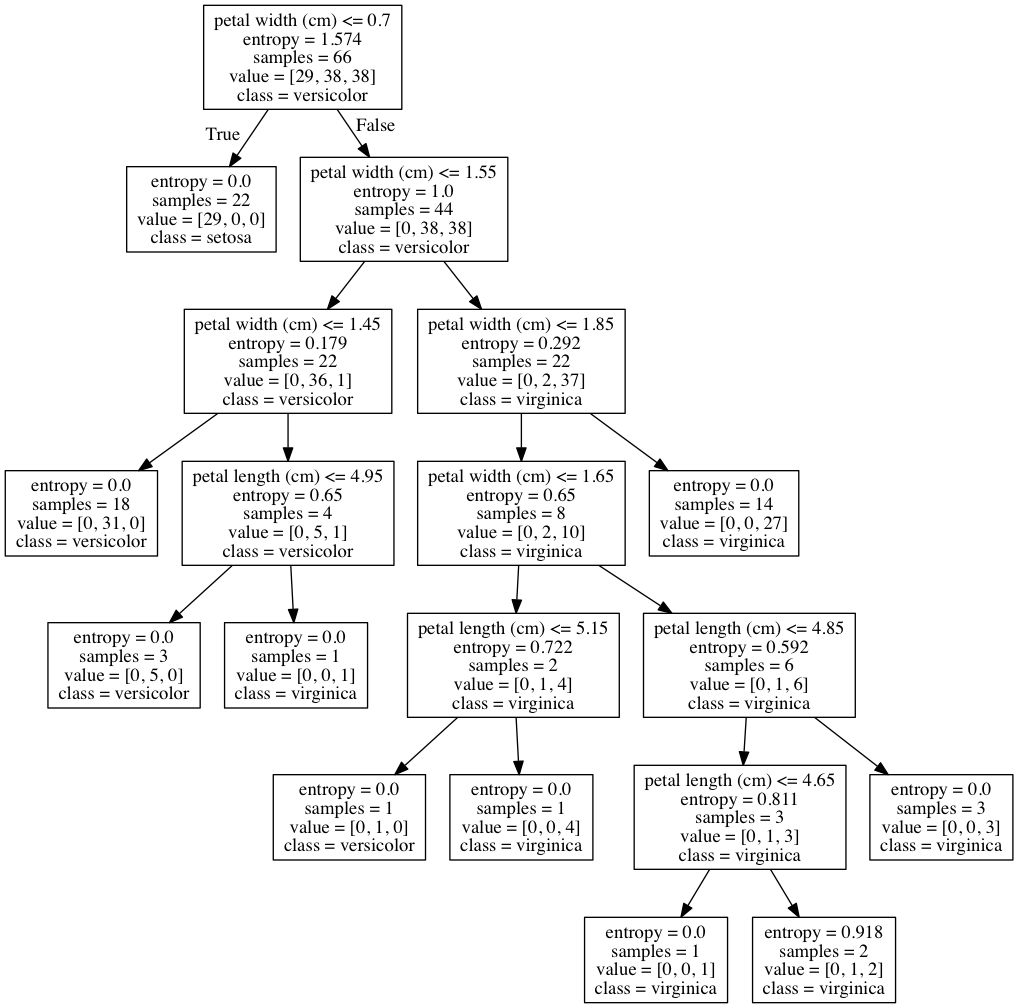

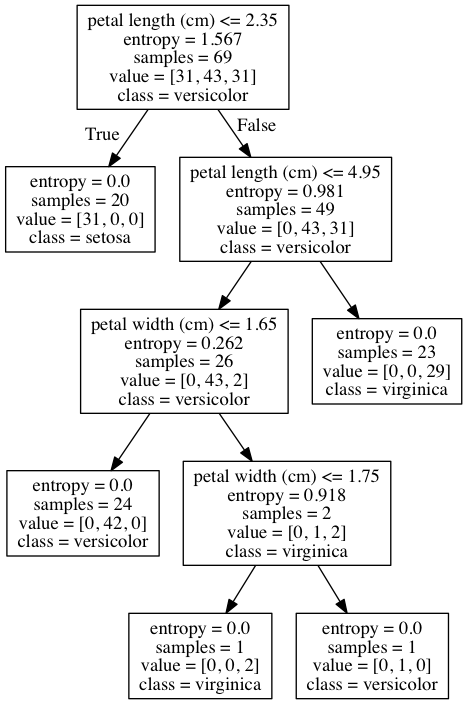

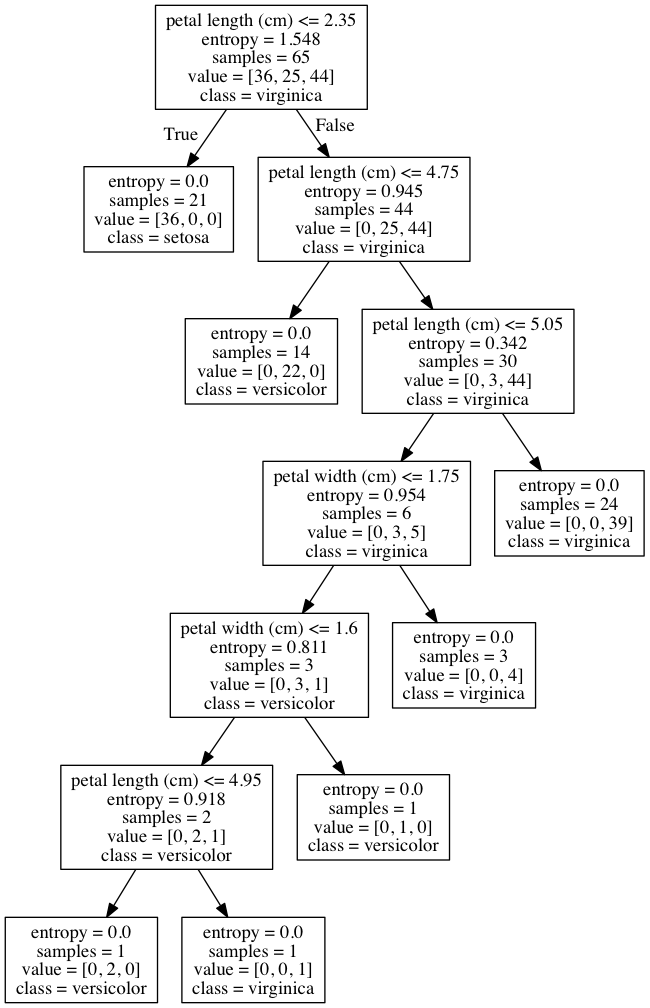

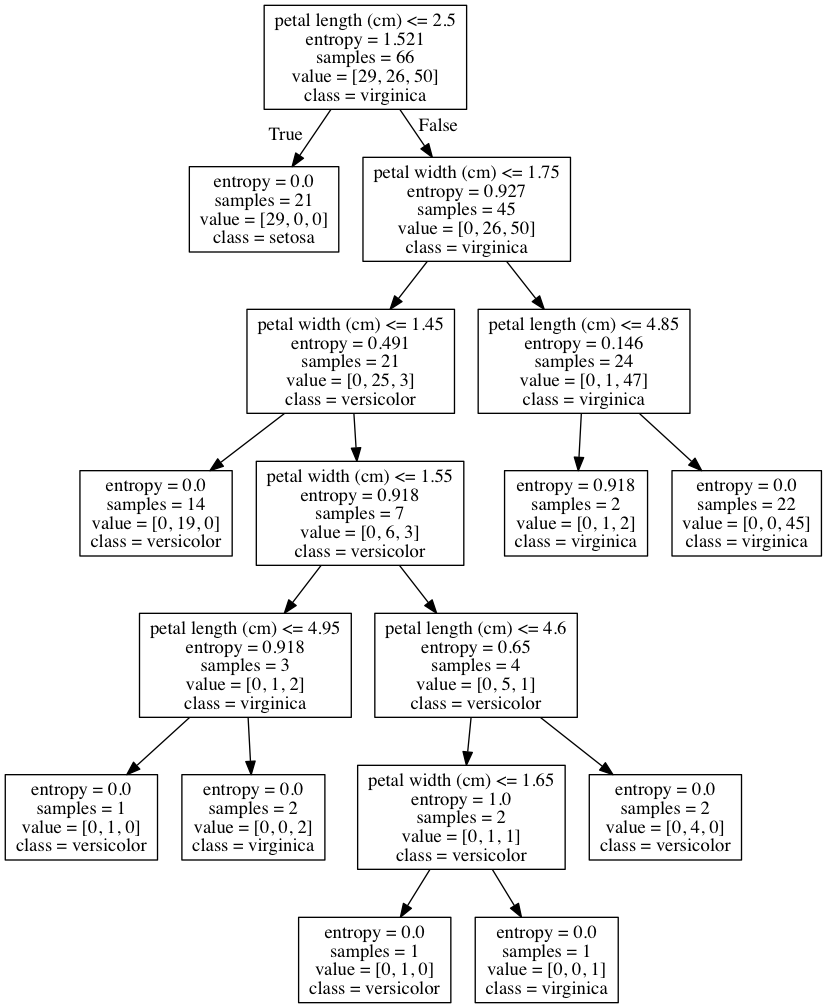

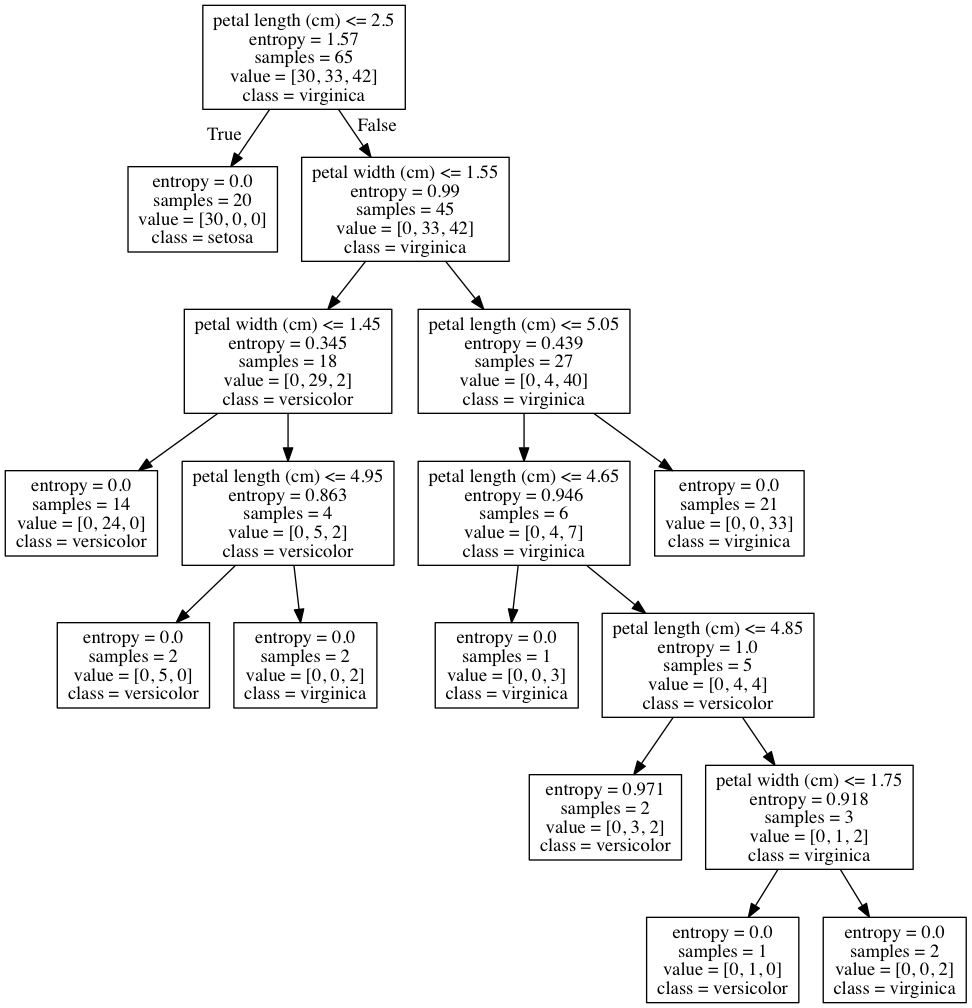

In [12]:
# Visualize
# from scikit decision tree tutorial: http://scikit-learn.org/stable/modules/tree.html
from sklearn import tree
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image
from IPython.display import display

i_tree = 0
for tree_in_forest in forest.estimators_:
    dot_data = StringIO()
    tree.export_graphviz(tree_in_forest, out_file=dot_data, feature_names=feature_names, class_names=target_names)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    image = Image(graph.create_png())
    display(image)
    i_tree = i_tree + 1